## Relationship between two variables
## Correlation

 - A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other. The fit of the data can be visually represented in a scatterplot. Using a scatterplot, we can generally assess the relationship between the variables and determine whether they are correlated or not.

![](https://xaktly.com/Images/ProbStat/Correlation/CorrelationCoefficientRange.png)

- -1: Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
- 0: No correlation. The variables do not have a relationship with each other.
- 1: Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).
![](https://cdn.corporatefinanceinstitute.com/assets/correlation1.png)

- rxy – the correlation coefficient of the linear relationship between the variables x and y
- xi – the values of the x-variable in a sample
- x̅ – the mean of the values of the x-variable
- yi – the values of the y-variable in a sample
- ȳ – the mean of the values of the y-variable

In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

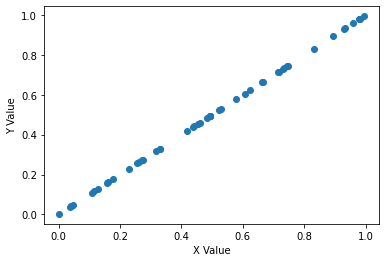

Correlation of X and Y: 1.00


In [5]:
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

In [6]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, .1, 50)

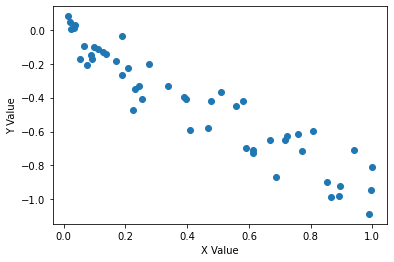

Correlation of X and Y: -0.94


In [7]:
plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.show()
print('Correlation of X and Y: %.2f'%np.corrcoef(X, Y)[0, 1])

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the target variable
- $x$ is the predictor
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## manual calculattion 
-> Lecture_03_2_manual simple linear model.docx

In [8]:
import pandas as pd
x = [6,6,6,3,9,3,9,3,9,6,3,9]
Y = [526,434,581,421,630,412,560,443,590,570,346,672]
data = pd.DataFrame(Y,x).reset_index()
data.columns = ['shelf_pace','sale']
data

,shelf_pace,sale
0,6,526
1,6,434
2,6,581
3,3,421
4,9,630
5,3,412
6,9,560
7,3,443
8,9,590
9,6,570


In [9]:
import statsmodels.formula.api as smf
# create a fitted model in one line
lm = smf.ols(formula='sale ~ shelf_pace', data=data).fit()
# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   sale   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     32.30
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           0.000203
Time:                        08:37:25   Log-Likelihood:                -63.264
No. Observations:                  12   AIC:                             130.5
Df Residuals:                      10   BIC:                             131.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    307.9167     39.437      7.808      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## pvalue P>|t|
- **null hypothesis:** There is no relationship between shelf_pace and sale (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between shelf_pace and sale (and thus $\beta_1$ is not equal to zero)

In [ ]:
# sig_level = 0.05, pvalue < sig_level -> co moi quan he tuyen tinh giua x va y

# Example: Multiple Linear Regression from Scratch <a href="#Example:-Multiple-Linear-Regression-from-Scratch-in-Numpy" class="anchor-link">¶</a>

## How does the model actually work behind the scenes?<a href="#How-does-the-model-actually-work-behind-the-scenes?" class="anchor-link">¶</a>

![](https://i.imgur.com/DT4H1Yk.jpg)

# Example: Multiple Linear Regression from Scratch <a href="#Example:-Multiple-Linear-Regression-from-Scratch-in-Numpy" class="anchor-link">¶</a>

## How does the model actually work behind the scenes?<a href="#How-does-the-model-actually-work-behind-the-scenes?" class="anchor-link">¶</a>

![](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548702778023.png)


In [15]:
# read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

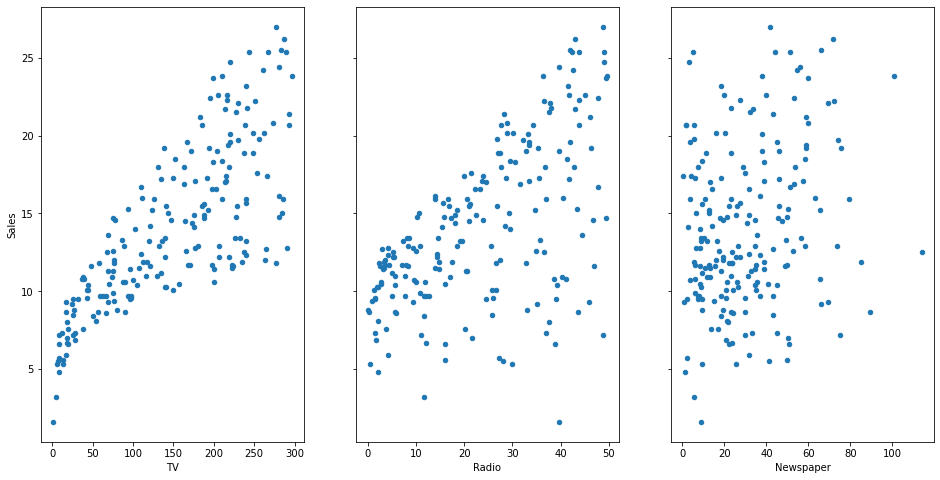

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [12]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        08:45:49   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [16]:
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
# print the coefficients
print(lm.summary())
# sale = 2.9 + 0.04*TV + 0.18*Radio
#TV tang len 1 -> sale tang 0.04
#Radio tang len 1 -> sale tang 0.188

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.83e-98
Time:                        08:58:44   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

## adjusted R square = 0.896
- 89.6% of variation in sales variable are explained by the model
- k = 2

## R square
![](https://miro.medium.com/max/2812/1*_HbrAW-tMRBli6ASD5Bttw.png)

## adjusted R square
![](https://www.k2analytics.co.in/wp-content/uploads/2020/04/R_squared-formula.png)
Where **n** is No. of row and **k** is No. of columns

- Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. 
- The adjusted R-squared increases when the new term improves the model more than would be expected by chance. 
- It decreases when a predictor improves the model by less than expected.

## Prob (F-statistic) = 4.83e-98 sig_level = 0.05
- **null hypothesis:** There is no significant effect in having independent variables (y = 2.911)
- **alternative hypothesis:** There is significant effect in having independent variables (y = 2.911 + B1xX1 + B2xX2)

## How the linear model work?
## Gradient Descent

- **y = mx +c**

- y: dependent variable
- x: independent variable
- m: coefficient
- c: y intercept (The value of Y is c when the value of X is 0)
![](https://editor.analyticsvidhya.com/uploads/283342.PNG)

- Cost Function
- The cost is the error in our predicted value. We will use the Mean Squared Error function to calculate the cost.
![](https://editor.analyticsvidhya.com/uploads/228155.PNG)
![](https://editor.analyticsvidhya.com/uploads/272996.PNG)
- n: number of rows

## Calculate the partial derivative of the Cost function with respect to m.
![](https://editor.analyticsvidhya.com/uploads/976048.PNG)

## Similarly, let’s find the partial derivative with respect to c
![](https://editor.analyticsvidhya.com/uploads/978019.PNG)

## m = m(model) - L x Dc
## c = c(model) - L x Dm

L: learning rate [0,1]: 0.01, 0.05.....

m(model) and c(model): algorithm will apply m(model) = 0 and c(model)= 0, then repeat the calculation until Cost function is very small (ideally = 0)


![](https://editor.analyticsvidhya.com/uploads/221784.PNG)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQdJU3xcGSkHZF4aWSXn4E_TFo_YClm24YsEg&usqp=CAU)
#number of interation: so lan mo hinh chay

## Case Study 1 weather data

In [17]:
# read the data and set the datetime as the index
import pandas as pd

# The website offers you the choice of downloading a training data and testing data separately
# This is better because then you can test your model on the unseen data after training 
weather = pd.read_csv('weatherHistory.csv')
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [19]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [20]:
import numpy as np
weather = weather.select_dtypes(include=np.number)
weather.drop(columns = ['Loud Cover'],inplace = True)
weather.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


<AxesSubplot:>

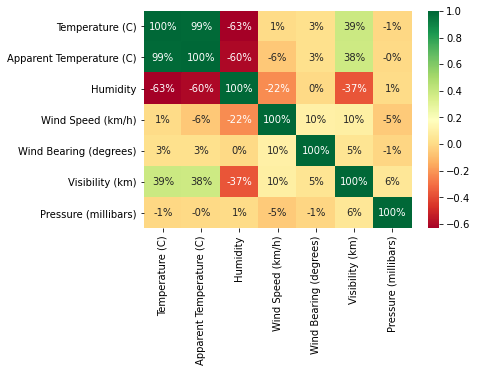

In [21]:
import seaborn as sns
# Lastly let us plot a corrlation map between each variable
# here the corr() function will plot a correlation map easily

sns.heatmap(weather.corr(),annot=True,fmt=".0%",cmap="RdYlGn")

In [22]:
weather.columns

Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

In [23]:
weather.rename(columns = {'Temperature (C)':'temp', 'Apparent Temperature (C)':'ap_temp',
                         'Wind Speed (km/h)':'wind_speed','Wind Bearing (degrees)':'wind_bear',
                         'Visibility (km)':'vision','Pressure (millibars)':'pressure'},inplace =True)
weather.head()

,temp,ap_temp,Humidity,wind_speed,wind_bear,vision,pressure
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51


In [25]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='ap_temp ~ temp + Humidity + wind_speed + wind_bear + vision + pressure ',
             data=weather).fit()
# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                ap_temp   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.567e+06
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:18:06   Log-Likelihood:            -1.4410e+05
No. Observations:               96453   AIC:                         2.882e+05
Df Residuals:                   96446   BIC:                         2.883e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5925      0.040    -65.075      0.0

In [26]:
#adj R sqr = 0.99  ->  99% ap_temp duoc giai thich boi mo hinh
#pvalue vision > sig_level = 0.05 -> ko co quan he tuyen tinh
#Prob(F statistc) = 0.00 -> co tac dong cua cac predictors den ap_tempt

In [27]:
# remove vision
import statsmodels.formula.api as smf
lm = smf.ols(formula='ap_temp ~ temp + Humidity + wind_speed + wind_bear  + pressure ',
             data=weather).fit()
# print the coefficients
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                ap_temp   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.880e+06
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:23:18   Log-Likelihood:            -1.4410e+05
No. Observations:               96453   AIC:                         2.882e+05
Df Residuals:                   96447   BIC:                         2.883e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5997      0.039    -66.635      0.0

In [29]:
from sklearn.linear_model import LinearRegression
from patsy import dmatrices
#predicting the target variable with the final model
y,X=dmatrices('ap_temp ~ temp + Humidity + wind_speed + wind_bear +pressure',
              weather,return_type="dataframe")
model = LinearRegression()
model = model.fit(X,y)
Y_Pred = model.predict(X)
Y_Pred[:5]

array([[7.96571844],
       [7.79383924],
       [8.80980744],
       [6.58312307],
       [7.39577174]])

In [30]:
y[:5]

,ap_temp
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


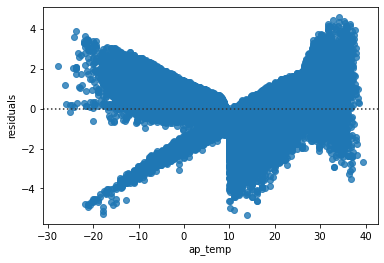

In [31]:
import matplotlib.pyplot as plt
ax12=sns.residplot(y,Y_Pred)
ax12.set_ylabel('residuals')
plt.show()
# residuals = Y_Pred - y

In [ ]:
# nhiet do qua cao hoac qua thap -> mo hinh du bao bi chenh nhieu so voi thuc te
# nhiet do 0-(<10) va nhieu do 20-30 -> mo hinh du bao kha chinh xac

In [33]:
residuals = Y_Pred - y
residuals=residuals.rename(columns={'ap_temp':'residuals'})
residuals.head()

,residuals
0,0.576830
1,0.566061
2,-0.567970
3,0.638679
4,0.417994


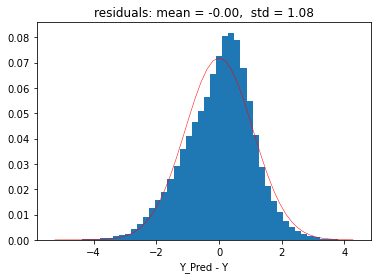

In [34]:
import scipy.stats as stats
#plotting residual distribution 
# Bin
n, bin_edges = np.histogram(residuals, 50)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram of residuals
plt.bar(bin_middles, bin_probability, width=bin_width)


# Fit to normal distribution
(mu, sigma) = stats.norm.fit(residuals)
std = residuals.std()
#plotting normal curve  
y_norm = stats.norm.pdf(bin_middles, mu, sigma)*bin_width
l = plt.plot(bin_middles, y_norm, 'r', linewidth=0.5)
plt.title( "residuals: mean = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Y_Pred - Y')
plt.show()

## Case study 2 pizza_palce

In [ ]:
# what about categorical variables?

In [35]:
pizzaplace = pd.read_csv('pizzaplace.csv')
pizzaplace.head()

,id,date,time,name,size,type,price,hour,dayparts,weekday,month,topping_number
0,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,11,Morning,Thu,Jan,3
1,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,11,Morning,Thu,Jan,5
2,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,11,Morning,Thu,Jan,8
3,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,11,Morning,Thu,Jan,5
4,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,11,Morning,Thu,Jan,6


In [36]:
print(pizzaplace['type'].unique())
print(pizzaplace['size'].unique())
print(pizzaplace['weekday'].unique())
print(pizzaplace['month'].unique())

['classic' 'veggie' 'chicken' 'supreme']
['M' 'L' 'S' 'XL' 'XXL']
['Thu' 'Fri' 'Sat' 'Sun' 'Mon' 'Tue' 'Wed']
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [48]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
results = smf.ols('price ~ topping_number + hour + type + size + weekday + month', 
                  data=pizzaplace).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 1.325e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:04:01   Log-Likelihood:                -82740.
No. Observations:               49574   AIC:                         1.655e+05
Df Residuals:                   49547   BIC:                         1.658e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.4878      0.051    3

In [ ]:
# type ['classic' 'veggie' 'chicken' 'supreme']
# Coef [   -0.91   -1.06       0      0.45  ]
# -> price(superme) > p(chicken)
#-> price(classic or veggie) < p(chicken)

In [39]:
#remove hour, weekday, month variable because of the non-linear relationships (P values is high)
#estimate next model
results = smf.ols('price ~ topping_number+C(type)+C(size)', 
                  data=pizzaplace).fit()
print(results.summary())
# -> nha hang nay la nha hang fastfood (luxury -> price~ weekday + month + hour)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 4.307e+04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:51:25   Log-Likelihood:                -82752.
No. Observations:               49574   AIC:                         1.655e+05
Df Residuals:                   49565   BIC:                         1.656e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             17.4991      0

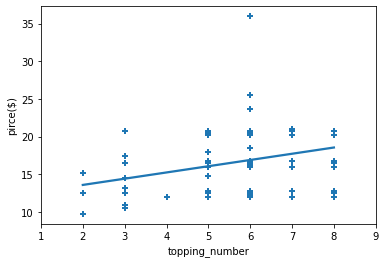

In [41]:
ax11=sns.regplot(y='price',x='topping_number',data=pizzaplace,marker='+')
ax11.set_xlim(1,9)
ax11.set_ylabel('pirce($)')
plt.show()

In [43]:
from patsy import dmatrices
#predicting the pizza price with the final model
y,X=dmatrices('price ~ topping_number+C(type)+C(size)',
              pizzaplace,return_type="dataframe")
model = LinearRegression()
model = model.fit(X,y)
Y_Pred = model.predict(X)
Y_Pred[:5]

array([[14.17442366],
       [15.12271177],
       [16.40160675],
       [19.86981753],
       [19.28176298]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


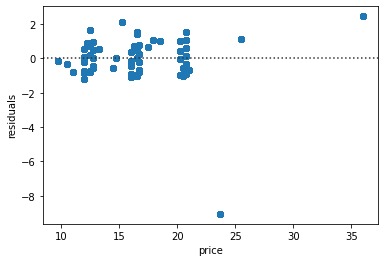

In [44]:
ax12=sns.residplot(y,Y_Pred)
ax12.set_ylabel('residuals')
plt.show()

In [45]:
residuals = Y_Pred - y
residuals=residuals.rename(columns={'price':'residuals'})

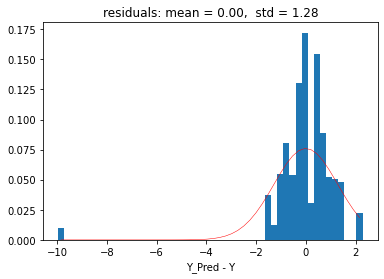

In [46]:
import scipy.stats as stats
#plotting residual distribution 
# Bin
n, bin_edges = np.histogram(residuals, 50)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram of residuals
plt.bar(bin_middles, bin_probability, width=bin_width)


# Fit to normal distribution
(mu, sigma) = stats.norm.fit(residuals)
std = residuals.std()
#plotting normal curve  
y = stats.norm.pdf(bin_middles, mu, sigma)*bin_width
l = plt.plot(bin_middles, y, 'r', linewidth=0.5)

plt.title( "residuals: mean = %.2f,  std = %.2f" % (mu, std))
plt.xlabel('Y_Pred - Y')
plt.show()

Reference: University of Derby